<a href="https://colab.research.google.com/github/Sumitraj17/Car_Price_Prediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import style
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
car_data = pd.read_csv("car data.csv")
car_data.head()

In [ ]:
car_data.info()

In [ ]:
car_data.isnull().sum()

In [ ]:
car_data.describe()

In [ ]:
car_data.columns

In [ ]:
print(car_data['Fuel_Type'].value_counts())

In [ ]:
print(car_data['Seller_Type'].value_counts())

In [ ]:
print(car_data['Transmission'].value_counts())

In [17]:
fuel_type = car_data['Fuel_Type']
seller_type= car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

In [ ]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing Categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling price")
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color='red')
plt.xlabel('Seller Type')
plt.subplot(1,3,3)
plt.bar(transmission_type,selling_price,color='purple')
plt.xlabel('Transmission type')
plt.show()

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type,y=selling_price,ax=axes[0])
sns.barplot(x=seller_type,y=selling_price,ax=axes[1])
sns.barplot(x=transmission_type,y=selling_price,ax=axes[2])

In [ ]:
petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

In [ ]:
seller_data = car_data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

In [29]:
# manual encoding
car_data.replace({'Fuel_Type':{'Petrol':0,"Diesel":1,'CNG':2}},inplace=True)
# one hot encoding
car_data = pd.get_dummies(car_data,columns=['Seller_Type','Transmission'],drop_first=True)

In [ ]:
car_data.head()

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(),annot=True)
plt.title("Correlation between the columns")
plt.show()

In [ ]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price',y='Selling_Price',data=car_data)

In [37]:
x = car_data.drop(['Car_Name','Selling_Price'],axis=1)
y=car_data['Selling_Price']

In [ ]:
print("Shape of X is: ",x.shape)
print("Shape of Y is: ",y.shape)

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print("X_test shape:- ",x_test.shape)
print("X_test shape:- ",x_train.shape)
print("y_test shape:- ",y_test.shape)
print("y_train shape:- ",y_train.shape)

In [ ]:
scaler = StandardScaler()

In [62]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [63]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
pred = model.predict(x_test)

In [ ]:
print("MAE: ",(metrics.mean_absolute_error(pred,y_test)))
print("MSE: ",(metrics.mean_squared_error(pred,y_test)))
print("R2 score ",(metrics.r2_score(pred,y_test)))

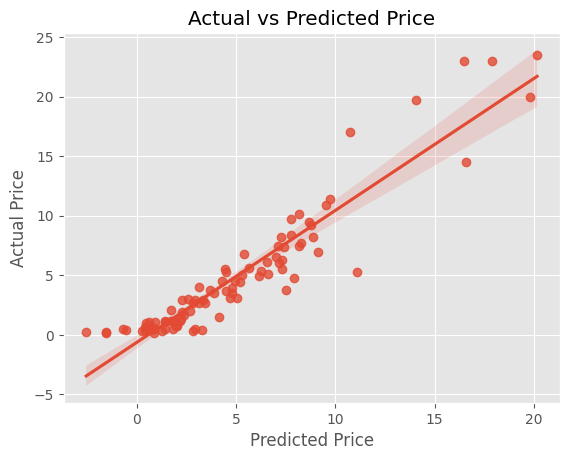

In [67]:
sns.regplot(x=pred,y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()